# Task 1 : Prediction using Supervised Machine Learning

In [1]:
# Importing dependencies
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  

### Step 1: Reading the data

In [3]:
student_data = pd.read_csv("./data/student_scores.csv")
student_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
print(f"Number of rows: {len(student_data.index)}")

Number of rows: 25


###  Step 2: Data Visualization

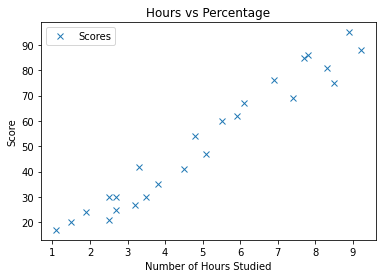

In [8]:
# Plotting the distribution of scores
student_data.plot(x='Hours', y='Scores', style='x')  
plt.title('Hours vs Percentage')  
plt.xlabel('Number of Hours Studied')  
plt.ylabel('Score')  
plt.show()

From the graph it can be assume that there is a positive linear relation between the number of hours studied and percentage of score.

###  Step 3: Data Preprocessing

In [9]:
X = student_data.iloc[:, :-1].values  
y = student_data.iloc[:, 1].values  

### Step 4: Model Training


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
regressor = LinearRegression()  
regressor.fit(X_train.reshape(-1,1), y_train) 

LinearRegression()

## Step 5 : Visualize Line of Best Fit

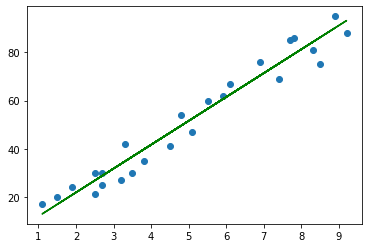

In [13]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='green');
plt.show()

### Step 6: Making Predictions


In [16]:
# Testing data 
y_pred = regressor.predict(X_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


### Step 7: Checking Results and drawing final conclusions

In [18]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [19]:
#Estimating training and test score
print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105355


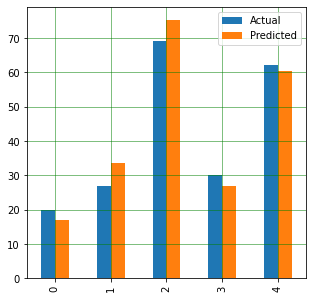

In [21]:
# Plotting the Bar graph to depict the difference between the actual and predicted value

df.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='green')
plt.grid(which='minor', linewidth='0.5', color='yellow')
plt.show()

In [22]:
# Testing the model with our own data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737535


### Step 8 - Performance Evaluation

In [23]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 4.647447612100367
R-2: 0.9454906892105355
